## predicting units of sales per total amount spent on advertisement using Machine Learning algorithms.
<b> In this article, I am using Marketing dataset as "Advertising.csv". I’ll discuss a project where I worked on predicting units of sales per total amount spent on advertisement using Machine Learning algorithms. The algorithms included simple linear regression. 

## Step - 1 : Business Problem Understanding
- <b> Identify relationship between total spend and sales ?
- <b> Our next ad campaign will have a total spend of $200,000, how many units do we expect to sell as a result of this ?

<b> importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b> In the above, i have imported all the necessary libraries.

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
df = pd.read_csv("Advertising.csv")

# Display the first 5 lines using the head() method.
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


### 2.2 Data Understanding
<b> Let’s have a look at data dimensionality.

In [3]:
df.shape

(200, 4)

<b> From the output, we can see that the table contains 200 rows and 4 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


<b> int64 is the data type of our features. We see that all features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 200 observations, the same number of rows we saw before with shape.
    
    
<b> Here 4 variables are there, all variables are numeric. The sales variable in units and the TV, radio and newspaper variables are in dollars.

<b> If someone was to spent a total of $200,000, what would the expected sales be ?


<b> We have simplified this quiet a bit by combining 3 features (TV, radio and newspaper) into "total spend".

In [5]:
# Calculating "total spend".
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]

# Display the first 5 lines using the head() method.
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


<b> Here I am predicting sales per total_spend, so TV, radio and newspaper variables are don't required.


<b> Now dropping the TV, radio and newspaper variables from the DataFrame and take a look at the first 5 lines using the head() method.

In [6]:
# Drop the unrequired variables.
df.drop(columns=["TV", "radio", "newspaper"], inplace=True)

# Display the first 5 lines using the head() method.
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)
<b> On the basis of this data, how should they spend advertising money in the future ? These general questions might lead me to more specific questions :
    
   1. Is there a relationship between ads and sales ?
   2. How strong is that relationship ?
   3. Given ad spending, can sales be predicted ?
    
    

<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [7]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


<b> Here I am using Pairplot to visualizes given data to find the relationship between them.

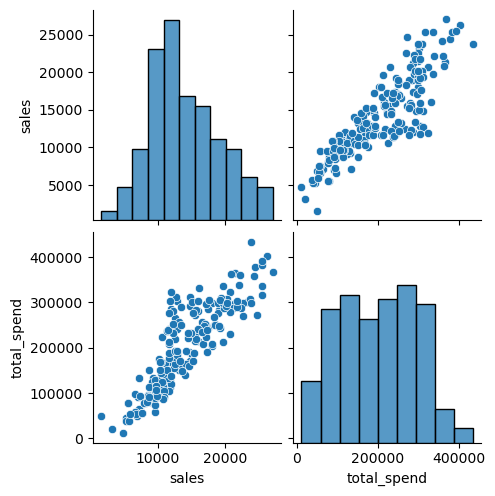

In [8]:
# plot the pairplot.
sns.pairplot(df)

# Display all figures.
plt.show()

<b> In the above, we can see that the sales Vs total_spend histogram shows normaly distributed and the sales Vs total_spend scatter plot shows a strong correlation between these two variables.
    
    
<b> The corr() method finds the correlation of each column in a DataFrame.

In [9]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


<b> The above matrix shows the strong correlation of the sales Vs total_spend.

### 3.2 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [10]:
# Check the missing values records.
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

<b> In the above, we can see that there is no missing values.
    
    
<b> Now checking the Duplicate records :

In [11]:
df.duplicated().sum()

0

<b> In the above, we can see that there is no duplicate values.
    
    
<b> Wrong data and wrong format data is also not there.

### 3.3 Data Wrangling
<b> Here all variables are numeric, so encoding is not required.

### 3.4 Train/Test Split
<b> Creating independent variable "total_spend" as "x" variable and dependent variable "sales" as "y" variable.

In [12]:
# Create x and y variables.
x = df[["total_spend"]]       # independent variable
y = df["sales"]               # dependent variable

<b> In the above, I have created x variable with 1 independent (input) variable and y variable with 1 dependent (output) variable.

In [13]:
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# Apply the train_test_split() function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In the first line of the above code, we have imported the train_test_split function from the sklearn library.


In the second line, we have used four variables, which are :

   - x_train: It is used to represent features for the training data
   - x_test: It is used to represent features for testing data
   - y_train: It is used to represent dependent variables for training data
   - y_test: It is used to represent independent variable for testing data
   
   
In the train_test_split() function, we have passed four parameters. In which first two are for arrays of data, and test_size is for specifying the size of the test set which tells the dividing ratio of training and testing sets. The last parameter, random_state, is used to set a seed for a random generator so that you always get the same result.

<b> View the dimensions of x_train, x_test, y_train, y_test

In [14]:
x_train.shape, x_test.shape

((140, 1), (60, 1))

In [15]:
y_train.shape, y_test.shape

((140,), (60,))

## Step - 4 : Modelling
<b> Now calculating a line of best fit that links x to y, the linear equation is given by :

        ŷ = B0 + B1*x

In [16]:
# fit the linear regression model

# import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# save the model as "model"
model = LinearRegression()

# Train the model using training sets
model.fit(x_train, y_train)


LinearRegression()

<b> Now we can get the coefficient and intercept values from the model using attributes like coef_ and intercept_ :

In [17]:
# print the intercept (B0)
model.intercept_

4199.10650086872

In [18]:
# print the regression coefficient or coef (B1)
model.coef_

array([0.04895385])

<b> From these two values, we can calculate best fit line that links x to y, so the linear equation become as:

       ŷ = 4199.10 + 0.048*x
    
    
<b> I have calculated the linear equation for best fit that links x to y.

## Predicting the results 
- <b> We have built the linear regression model. Now it is time to predict the results.
    
    
<b> Predicting the test set results

In [19]:
# Predict on the train data set.
train_prediction = model.predict(x_train)

# Predict on the test data set.
test_prediction = model.predict(x_test)


## Step - 5 : Evaluation (Evaluate Model Performance)
<b> I have built the linear regression model and use it to predict the results. Now, it is time to evaluate the model performance. We want to understand the outcome of our model and we want to know whether the performance is acceptable or not. For regression problems, there are several ways to evaluate the model performane. These are listed below :

    
   -  Mean Absolute Error (MAE)
   -  Mean Square Error (MSE)
   -  Root Mean Square Error (RMSE)
   -  Coefficient of Determination (R2_score)
    
    
<b> I have described these measures in following sections : 
        

<b> a) Mean Absolute Error (MAE) :

In [20]:
# import the mean_absolute_error class from sklearn.metrics library
from sklearn.metrics import mean_absolute_error

# MAE for test data and print it.
print("MAE for test data:", mean_absolute_error(y_test, test_prediction))

# MAE for train data and print it.
print("MAE for train data:", mean_absolute_error(y_train, train_prediction))


MAE for test data: 1914.362736813055
MAE for train data: 1963.9767578200754


Here we will not recommend to go with the MAE for this dataset, because we need to calculate min Error due to the complexity that comes with the differentiation of absolute values, i.e. we are going with differentiation.

<b> b) Mean Square Error (MSE) :

In [21]:
# import the mean_squared_error class from sklearn.metrics library
from sklearn.metrics import mean_squared_error

# MSE for test data and print it.
print("MSE for test data:", mean_squared_error(y_test, test_prediction))

# MSE for train data and print it.
print("MSE for train data:", mean_squared_error(y_train, train_prediction))

MSE for test data: 6415866.312543217
MSE for train data: 6811655.464246886


Here we will not recommend to go with the MSE for this dataset, because here units gets squared.

<b> c) Root Mean Square Error (RMSE) :

In [22]:
# import the mean_squared_error class from sklearn.metrics library
from sklearn.metrics import mean_squared_error

# RMSE for test data and print it.
print("RMSE for test data:", np.sqrt(mean_squared_error(y_test, test_prediction)))

# RMSE for train data and print it.
print("RMSE for train data:", np.sqrt(mean_squared_error(y_train, train_prediction)))

RMSE for test data: 2532.956042362997
RMSE for train data: 2609.9148385046756


<b> d) Coefficient of Determination (R2_score)

In [23]:
# import the r2_score class from sklearn.metrics library
from sklearn.metrics import r2_score

# Coefficient of Determination (R2_score) for test data and print it.
print("R2 for test data:", r2_score(y_test, test_prediction))

# Coefficient of Determination (R2_score) for train data and print it.
print("R2 for train data:", r2_score(y_train, train_prediction))

R2 for test data: 0.7650262463310723
R2 for train data: 0.7404192834391545


In [24]:
# Test R-Square
model.score(x_test, y_test)

0.7650262463310723

In [25]:
# Train R-Square
model.score(x_train, y_train)

0.7404192834391545

<b> Training set and testing set performances are comparable. From the above we conclude that, we have got good accuracy on train and test data sets. We got an accuracy of 76.50% with this model.

## Checklist :
<b> For any Supervised Machine Learning Alorithm, we need to follow these checklist :
    
   1. Check whether model has Overfitting or Underfitting problem.
   2. Is Test Accuracy = Cross Validation Score
   3. Check Assumptions (If it is linear regression only)
   4. Check model meets the business problem requirements.
   5. Finally, save the model and share to the deployment team.

### 1. Is model has Overfitting or Underfitting problem.
    
    
- <b> From the above, we can see that the training set accuracy is 74.04% and testing set accuracy is 76.50%. Training set and testing set performances are comparable. From the above we conclude that, we have got good accuracy on train and test data sets, hence Overfitting or Underfitting problem is not there in this data set.

### 2. Is Test Accuracy = Cross Validation Score

In [26]:
# Calculate the Cross Validation Score.

# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and store it in "score" object.
score = cross_val_score(model, x, y, cv=5)

# Print the result.
print(score)

# calculate the mean of the score.
cv_score = score.mean()

# Print the mean of the score.
print(cv_score)


[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
0.7433783178555419


In the above, first I have imported cross_val_score class from sklearn.model_selection library, then applied the cross_val_score class.


   - Here "model" is a estimator/instantiate of LinearRegression.
   - x is a independent (input) variable.
   - y is a dependent (output) variable.
   - cv is determines the cross-validation splitting strategy. Here I have passed splitting strategy (cv=5).
   
   
It returns the 5 score's (accuracy) by cross-validation. Then i have applied the mean() on that result and printed that mean result on console. Here Cross Validation Score is 0.7433


<b> from the above, i have conclude that the  Test Accuracy almost equal's to Cross Validation Score.

### 3. Check for Assumptions 
<b> These are some formal checks while building a Linear Regression model, which ensures to get the best possible result from the given dataset.
    
    a) Linearity of Errors
    b) Normality of Errors
    c) Equal Variance of Errors (Homoscadesicity)
    d) Variables Significance

#### a) Linearity of Errors :
- <b> Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a scatter plot to check the relation of observed values (y_test) Vs fitted values (Errors or Residuals).
    

In [27]:
# Calculate the Errors or Residuals.
residuals = y_test - test_prediction

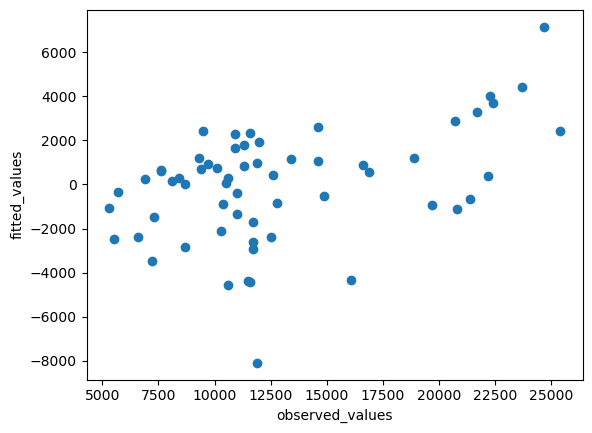

In [28]:
# visualize the relationship between the residual vs observed values using scatterplot.

# Draw the scatter plot.
plt.scatter(y_test, residuals)

# Set the x-label name.
plt.xlabel("observed_values")

# Set the y-label name.
plt.ylabel("fitted_values")

# Display all figures.
plt.show()

<b> By looking at the plots we can see that it's an accurately linear shape. Here actual test value and predicted values are almost same, less residuals are there.

#### b) Normality of Errors :
- <b> Checking the normality of the errors (residuals).

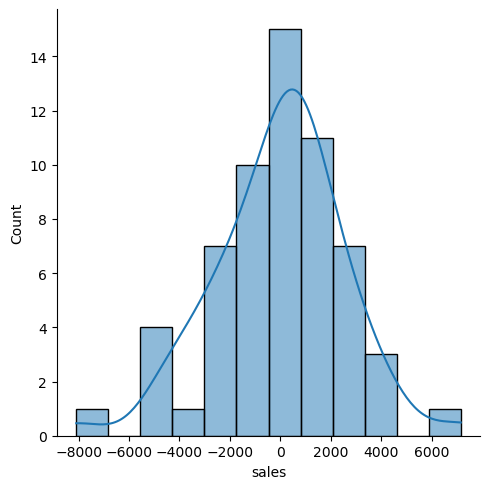

In [58]:
# Draw the histogram plot on residuals Vs count by using seaborn.diplot().

# Draw the histogram plot.
sns.displot(residuals, kde=True)

# Display all figures.
plt.show()

<b> By looking at the plots we can see that the residuals are normally distributed for the number of test points.

#### c) Equal Variance of Errors (Homoscadesicity) :
- Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

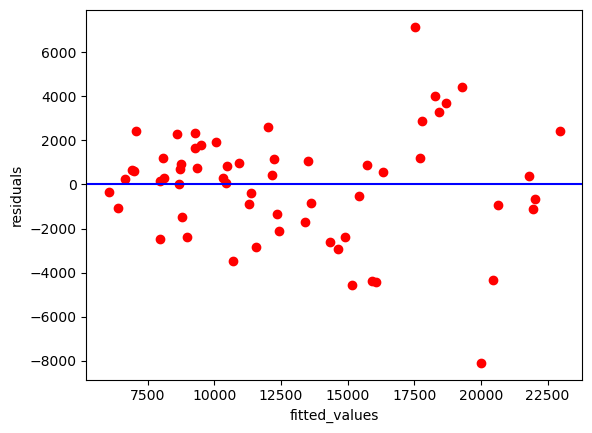

In [59]:
# Draw the scatter plot on residuals Vs test_prediction by using scatter().

# Draw the scatter plot.
plt.scatter(test_prediction, residuals, c='r')

# Add a horizontal line across the Axes where y=0.
plt.axhline(y=0, color='blue')

# Set the x-label name.
plt.xlabel("fitted_values")

# Set the y-label name.
plt.ylabel("residuals")

# Display all figures.
plt.show()

<b> from the above plot, we can see that all the values between ± 5000, so residuals have equal or almost equal variance across the regression line.

#### d) Variables Significance (Independence of Errors) :
- Checking the residuals are independent.or not. Let's check this based on Ordinary Least Squares (OLS) Using StatsModels.

In [60]:
# import the ols class from statsmodels.formula.api library
from statsmodels.formula.api import ols

# create our formula and pass it through to the OLS methods 
# pass the data=df and use fit() to fit the linear model.
# Store the result in "model2" object.
model2 = ols("y~x", data=df).fit()

# evaluate how the model performed and print it.
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           5.06e-62
Time:                        15:46:56   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above, first i have imported the ols class from statsmodels.formula.api library, then created a formula as "y~x" by assuming linear regression model, pass the 'df' DataFrame and used fit() to fit (calculate) the linear model, same result stored in the 'model2' object and printed (evaluate) how the model performed.


Taking a look at this, we see a number of different types of values. From the above I required only one P>|t| based on that i will take a decision on Independence of Errors. We will go into detail about this one major observation below :


- P>|t| is the P-value for the null hypothesis that the coefficient is equal to zero. If the value is less than the confidence level, usually 0.05, it means that the null hypothesis can be rejected and there is a significant relationship between the coefficient value and the parameter.


- Here hypothesis testing comes into picture, formulate the Null Hypotheses (Ho) and Alternative Hypotheses (H1). :

    Ho : B1=0 (average line is best line)
    
    H1 : B1≠0 (regression line is best line)
    
    
- Based on the p-value, conclude the Hypothesis test.

     - If p-value ≤ alpha (p low Null go)    <---> (Reject Ho)
     - If p-value > alpha (p high Null fly)  <---> (Do not Reject Ho)
     

<b> In the above, we can see that P>|t| (probability) is less than the confidence level, i.e. p-value (0.000) < confidence level (0.05), hence p low Null go reject the Ho (Null Hypothesis). So regression line is best line and the residuals are independent.

## Step - 6 : Final Inferences
<b> Our next ad campaign will have to a total spend of $200,000 on Ads, how many units could we expect to sell as a result of this ?

In [63]:
# use the model to make predictions on a new value.
model.predict([[200000]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13989.87609126])

<b> Based on the above prediction, your next ad campaign will have to a total spend of $200,000 on Ads, you can expect 13989 units could to sell.

## Save a Model
<b> To save the model, we can use the package pickle which is already available in Python. Here I will save the simple linear regression model that I have created in a file called model (we can save it in the "sales_model.joblib" folder).
    
    
<b> Persist an arbitrary Python object into one file.
    
<b> dump: For serializing an object hierarchy, we can use dump() function.

In [66]:
# import the dump class from joblib library
from joblib import dump

# Save the model.
dump(model, "sales_model.joblib")

['sales_model.joblib']

In the above, I have imported dump class from joblib library, the dump is used to persist an arbitrary Python object into one file. Here I have passed two parameters, one was "model" object, the object to store to disk and another one was "sales_model.joblib" which is the file object or path of the file in which it is to be stored. It will returns the the list of file names in which the data is stored.

## Load a Model
<b> Load code into the current frontend.
    
<b> load: For deserializing a data stream, we can use the loads() function.

In [67]:
# import the laod class from joblib library
from joblib import load

# Load the model and store it in "loaded_model" object.
loaded_model = load("sales_model.joblib")

# Apply the loaded_model to make predictions on a new value.
loaded_model.predict([[200000]])

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13989.87609126])